## Assignment 1

**Background**: 

" There is a serious lack of empirical evidence describing how diet affects human attractiveness to disease vectors. While one study suggested that people are more attractive to laboratory bred Aedes mosquitoes after beer consumption the effect of beer consumption on attractiveness to malaria mosquitoes from natural populations remains untested. As alcohol consumption is rising in most endemic malaria areas, it is becoming urgent to assess its effects on human attractiveness to malaria vectors."

<li> Number of volunteers that were assigned to drink beer were: 25 
<li> Number of volunteers that were assigned to drink water were: 18

-http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0009546
### Using the dataset mosquitos_data.csv from the video, write Python code:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 

import numpy as np
np.random.seed(123)
import pandas as pd
import statistics
pd.options.display.max_rows = 10

In [3]:
#reading data into a DataFrame
df = pd.read_csv('mosquitos_data.csv')
df

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer
...,...,...
38,22,Water
39,20,Water
40,24,Water
41,18,Water


** Create side-by-side boxplots for the number of mosquitos in each group (Beer vs Water) **

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'Number of mosquitos attracted')

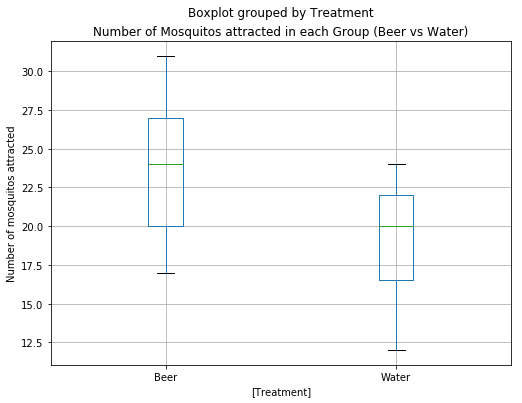

In [4]:
df.boxplot(by='Treatment',figsize=(8,6))
plt.title('Number of Mosquitos attracted in each Group (Beer vs Water)')
plt.ylabel('Number of mosquitos attracted')

** What does the graph reveal about the data for both groups?**

 A box plot summarizes a data set using five statistics: the **median, interquartile range (IQR), first quartile (Q1), third quartile (Q3) and whiskers**.  
 
 <li>The median is the number in the middle when the results are ordered from smallest to largest. In the box plots above, it is denoted by the green line: 50% of the data falling below the median and other 50% falling above the median. 
 <li>The inter quartile range (IQR) is the total length of the ,"box", rectangle to represent the middle 50% of the data. The more variable the data, the larger the IQR. 
 <li>The two boundaries of the box are called the first quartile (the 25th percentile, i.e. 25% of the data fall below this value) and the third quartile (the 75th percentile). 
 <li>The whiskers attempt to capture the data outside of the box, however, their reach is never allowed to be more than 1.5 X IQR.
 
 Firstly, when we look at the two box plots above, we notice that the median (green line) for the treatment group that were assigned to drink beer is higher than that of those who drank water. Secondly, we can observe that the IQR box for the treatment group 'Beer' is located higher than the IQR box for the treatment group 'Water' as well as it is longer. Thus, both the first quartile and the third quartile values for the treatment group 'Beer' are higher than that of treatment group 'Water'. The whiskers represent the extent of range of the results and we can see that for the treatment group 'Beer', the minimum number of mosquitos attracted were approximately 17,and the maximum number of mosquitos attracted were 31. On the other hand, the minimum number of mosquitos attracted for the treatment group 'Water' was 12 and the maximum value was 24 respectively. 
 
 

**Is there an association between beer consumption and attractiveness to mosquitos?**

By looking at the box plots above, we can see an association between beer consumption and attractiveness to mosquitos: overall, body odours of volunteers who consumed beer tend to increase their attractiveness to mosquitos. Thus, we can say that there is a positive association between beer consumption and attractiveness to mosquitos. 

**Calculate basic statistics measures for each group: the mean, median, standard deviation – Explain the numbers**

In [5]:
df_stats=df.groupby('Treatment')
df_stats
print('The mean for each group is: \n', df_stats.mean())

The mean for each group is: 
             Response
Treatment           
Beer       23.600000
Water      19.222222


The mean, is a common way to measure the center of a distribution of data. In this experiment, the mean represents the average number of mosquitos attracted by volunteers that consumed either beer or water. The average number of mosquitos attracted by volunteers who drank beer is 23.6 while who drank water is 19.2 respectively. 

In [6]:
print('The median for each group is: \n', df_stats.median())

The median for each group is: 
            Response
Treatment          
Beer             24
Water            20


As mentioned above, the median is the number in the middle when the results are ordered from smallest to largest : 50% of the data falling below the median and other 50% falling above the median. When there are an odd number of observations, there will be exactly one observation that splits the data into two halves, and in such a case that observation is the median (no average needed). However, if there are an even number of observations, there will be two values in the middle, and the median is taken as their average. In this experiment, the median for the group of volunteers that drank beer attracted 24 mosquitos and the median for the group of volunteers that drank water attracted 20 mosquitos. 


In [7]:
print('The standard deviation for each group is: \n', df_stats.std())


The standard deviation for each group is: 
            Response
Treatment          
Beer       4.133199
Water      3.671120


The standard deviation roughly describes how far away the observation is from the mean and it is useful when considering how close the data are to the mean. In this experiment, most observations for the treatment group that drank Beer fall within roughly 4.1 mosquitos from the mean and 3.6 respectively for the group that drank water.

### Write the code to implement the data simulation demonstrated in the video

In [8]:
g_mean = df_stats.mean()
#Calculate the difference of mean between the two groups
df_mean=g_mean.iloc[0]-g_mean.iloc[1]
df_mean

Response    4.377778
dtype: float64

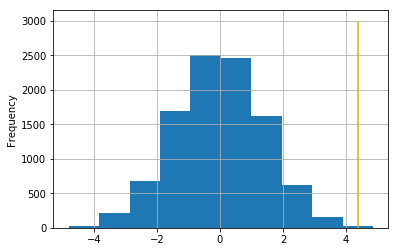

In [12]:
#Create a list that will contain results of 43 permutations (18 Water& 25 Beer) of difference of mean by running 10,000 iterations
a=[]
for i in range (10000):
    p=np.random.permutation(43)
    d=df.iloc[p[:25]].Response.mean()-df.iloc[p[-18:]].Response.mean()
    a.append(d)
pd.Series(a).plot.hist()
plt.grid()
plt.vlines(df_mean,ymin=0,ymax=3000,color='y')

We can see that the mean difference of 4.37 (rounded to 4.4 in the video) is rare and despite individual volunteer variation, beer consumption consistently increased attractiveness to mosquitos.